In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import pandas as pd
from glob import glob

from functions import *
from models import *

import tensorflow as tf
from livelossplot import PlotLossesKeras
os.environ["CUDA_VISIBLE_DEVICES"] = "3" # pick a number < 4 on ML4HEP; < 3 on Voltan 
physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)

2022-01-21 15:42:23.457587: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2022-01-21 15:42:23.490572: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1561] Found device 0 with properties: 
pciBusID: 0000:c1:00.0 name: Quadro RTX 6000 computeCapability: 7.5
coreClock: 1.77GHz coreCount: 72 deviceMemorySize: 23.65GiB deviceMemoryBandwidth: 625.94GiB/s
2022-01-21 15:42:23.490848: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2022-01-21 15:42:23.493303: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2022-01-21 15:42:23.495931: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcufft.so.10
2022-01-21 15:42:23.496461: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcurand.so.10
2

In [3]:
column_names = ["μ_δ", "μ_α", "δ", "α", "color", "mag", "lon", "lat", "μ_loncoslat", "μ_lat"]

In [4]:
gd1_stars = np.load('./gaia_data/gd1/gd1_stars.npy')

# Load a file and label the stream stars

In [ ]:
filename = "./gaia_data/gd1/gaiascan_l207.0_b50.2_ra148.6_dec24.2.npy"
df = pd.DataFrame(np.load(filename), columns = column_names)
is_stream, stream = FilterGD1(np.array(df), gd1_stars)

In [ ]:
plt.hist2d(df.μ_lat, df.μ_loncoslat, bins=np.linspace(-30,10,50));

In [ ]:
plt.hist2d(df.lon, df.lat, bins=100);

In [ ]:
plt.figure(dpi=100)
plt.scatter(df[is_stream].α, df[is_stream].δ)
plt.xlabel(r"$\alpha$")
plt.ylabel(r"$\delta$")
plt.title("GD1 Stars in this Patch");

# Get GD1 stars from all patches

In [ ]:
patch_list = [
 # b = 33.7 
 './gaia_data/gd1/gaiascan_l195.0_b33.7_ra128.4_dec28.8.npy',
 './gaia_data/gd1/gaiascan_l210.0_b33.7_ra132.6_dec16.9.npy',
 './gaia_data/gd1/gaiascan_l225.0_b33.7_ra138.1_dec5.7.npy', 
 # b = 41.8 
 './gaia_data/gd1/gaiascan_l187.5_b41.8_ra136.5_dec36.1.npy',
 './gaia_data/gd1/gaiascan_l202.5_b41.8_ra138.8_dec25.1.npy',
 './gaia_data/gd1/gaiascan_l217.5_b41.8_ra142.7_dec14.5.npy', 
 # b = 50.2 
 './gaia_data/gd1/gaiascan_l99.0_b50.2_ra224.7_dec60.6.npy',
 './gaia_data/gd1/gaiascan_l117.0_b50.2_ra202.4_dec66.5.npy',
 './gaia_data/gd1/gaiascan_l135.0_b50.2_ra174.3_dec65.1.npy',
 './gaia_data/gd1/gaiascan_l153.0_b50.2_ra156.2_dec57.5.npy',
 './gaia_data/gd1/gaiascan_l171.0_b50.2_ra148.6_dec47.0.npy',
 './gaia_data/gd1/gaiascan_l189.0_b50.2_ra146.9_dec35.6.npy',
 './gaia_data/gd1/gaiascan_l207.0_b50.2_ra148.6_dec24.2.npy',
 # b = 58.4 
 './gaia_data/gd1/gaiascan_l101.2_b58.4_ra212.7_dec55.2.npy',
 './gaia_data/gd1/gaiascan_l123.8_b58.4_ra192.0_dec58.7.npy',
 './gaia_data/gd1/gaiascan_l146.2_b58.4_ra171.8_dec54.7.npy',
 './gaia_data/gd1/gaiascan_l168.8_b58.4_ra160.5_dec45.5.npy',
 './gaia_data/gd1/gaiascan_l191.2_b58.4_ra156.9_dec34.1.npy',
 # b = 66.4 
 './gaia_data/gd1/gaiascan_l105.0_b66.4_ra203.7_dec49.1.npy',
 './gaia_data/gd1/gaiascan_l135.0_b66.4_ra185.4_dec50.0.npy',
 './gaia_data/gd1/gaiascan_l165.0_b66.4_ra171.4_dec43.0.npy',    
]

In [ ]:
dfs = []

for file in tqdm(patch_list):
    df = pd.DataFrame(np.load(file), columns = column_names)
    is_stream, stream = FilterGD1(np.array(df), gd1_stars)
    df["stream"] = is_stream
    df["patch_id"] = patch_list.index(file)
    dfs.append(df)

In [ ]:
df_all = pd.concat([df for df in dfs])
df_all['α'] = df_all['α'].apply(lambda x: x if x > 100 else x + 360) # wrap around plot
df_all.to_hdf("gd1_allpatches.h5", key="df")

In [ ]:
gd1_stars_in_patches = pd.concat([df[df.stream] for df in dfs])

In [ ]:
plt.figure(dpi=150)
plt.scatter(gd1_stars_in_patches.α, gd1_stars_in_patches.δ, marker='.')
plt.xlabel(r"$\alpha$")
plt.ylabel(r"$\delta$")
plt.title("GD1 Stars in All Patches");

That's a little funky, let's modify it:

In [ ]:
gd1_stars_in_patches['α_new'] = gd1_stars_in_patches['α'].apply(lambda x: x if x > 100 else x + 360)

In [ ]:
plt.figure(figsize=(12,3),dpi=150)
plt.scatter(gd1_stars_in_patches.α_new, gd1_stars_in_patches.δ, marker='.', c=gd1_stars_in_patches.μ_δ)
plt.colorbar(label=r"$\mu_\delta$")
plt.xlabel(r"$\alpha$")
plt.ylabel(r"$\delta$")
plt.title("GD1 Stream (21 patches)");

# Define a new, optimized tail patch

Load all the patches:

In [138]:
df_all = pd.read_hdf("./gaia_data/gd1/gd1_allpatches.h5")

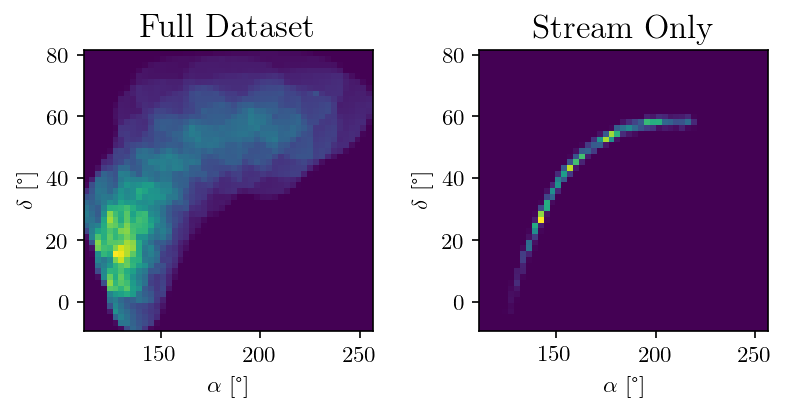

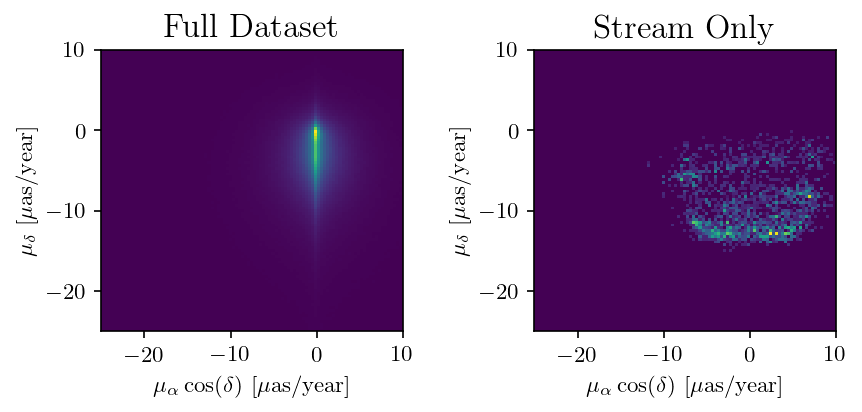

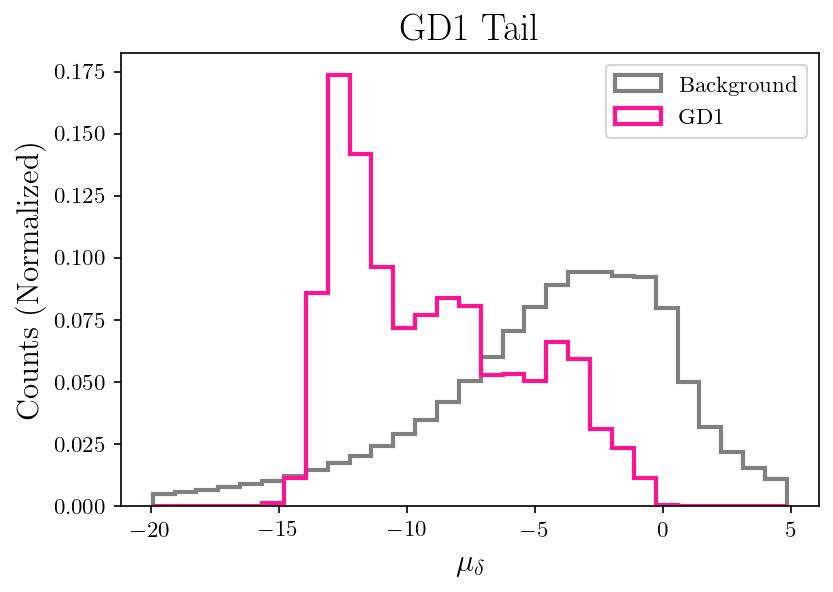

In [139]:
visualize_stream(df_all)

Define a new, optimized patch for the tail & save it:

In [150]:
# df = df_all[(df_all.α > 120) & (df_all.α < 140)] # select just the (left) tail area 
df = df_all[(df_all.α > 185) & (df_all.α < 230)] # select just the (right) tail area 
# df.α = df.α - df.α.mean()
# df.δ = df.δ - df.δ.mean()
df = df[(df.α - df.α.mean())**2 + (df.δ - df.δ.mean())**2 < 15**2]

In [151]:
df

,μ_δ,μ_α,δ,α,color,mag,lon,lat,μ_loncoslat,μ_lat,stream,patch_id
13932,-2.025722,-26.440475,54.597511,209.908173,1.138710,18.401842,-8.560662,-5.000107,-26.223240,3.942587,False,6
13933,-0.918837,-4.189368,54.606533,209.877991,2.251635,20.765278,-8.575741,-4.987397,-4.288722,0.043916,False,6
13934,0.226122,2.080620,54.475040,210.035080,1.008951,20.959970,-8.515998,-5.135907,2.078911,-0.241327,False,6
13935,-10.079991,1.180119,54.573032,209.830612,1.766085,20.089493,-8.610137,-5.013880,-1.117431,-10.087133,False,6
13936,-18.221418,-42.275925,54.566113,210.072418,2.041700,20.843729,-8.474525,-5.051904,-45.260793,-8.410377,False,6
...,...,...,...,...,...,...,...,...,...,...,...,...
896411,-3.171177,-3.709294,49.402752,206.685898,0.383755,20.381149,13.672237,1.372752,-2.680789,-4.077817,False,19
896412,-4.027586,-2.455287,48.350254,207.132538,0.617414,19.615927,14.249888,0.445151,-1.212029,-4.558604,False,19
896413,-6.103157,-2.090647,48.499958,206.956436,0.879160,20.721363,14.095461,0.555728,-0.288305,-6.444859,False,19
896414,-3.746002,-9.393969,48.680573,207.628189,1.079447,17.604092,14.469707,0.855733,-7.905163,-6.307739,False,19


In [ ]:
df.to_hdf("./gaia_data/gd1_tail/gd1_tail_optimized_patch_left.h5", "df")

# Load the optimized patch & train:

In [5]:
df = pd.read_hdf("./gaia_data/gd1_tail/gd1_tail_optimized_patch.h5", "df")

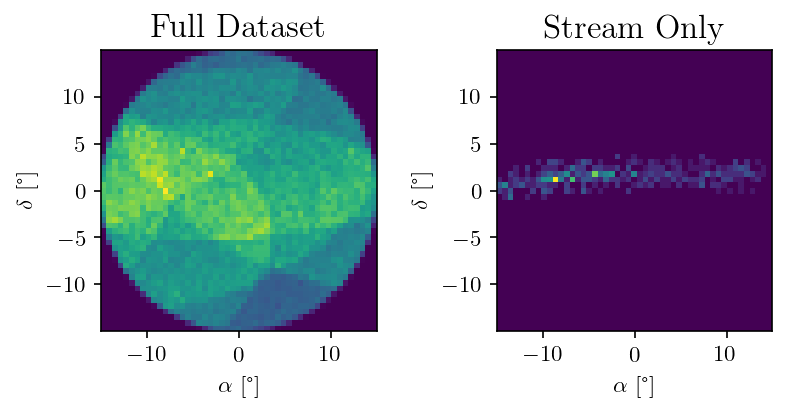

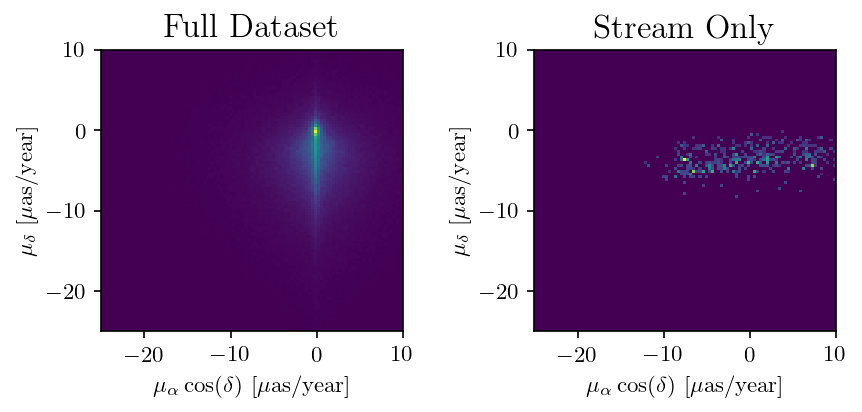

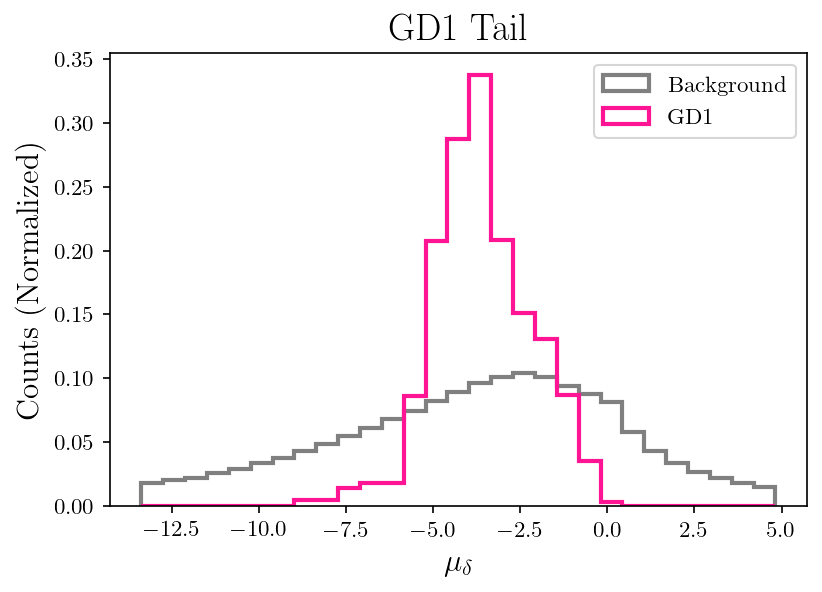

In [6]:
visualize_stream(df)

Sideband region: [-7.0,-3.0]
Signal region: [-6.0,-3.1]
Total counts: SR = 613,849, SB = 181,925


/clusterfs/ml4hep/mpettee/GaiaCWoLa/functions.py:266: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_slice['label'] = np.where(((df_slice.μ_δ > sr_min) & (df_slice.μ_δ < sr_max)), 1, 0)
No handles with labels found to put in legend.


Signal region has 1,565 stream and 612,284 bkg events (0.26%).
Sideband region has 94 stream and 181,831 bkg events (0.05%).
f_sig = 4.9X f_sideband.


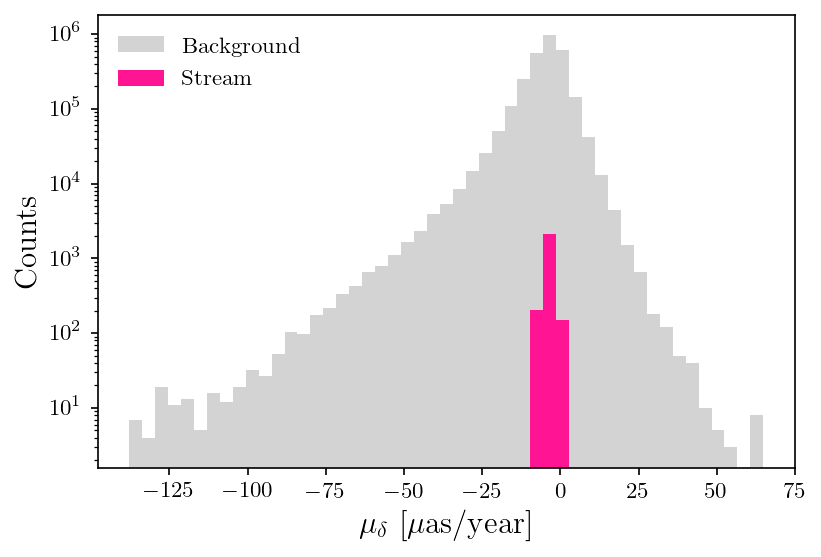

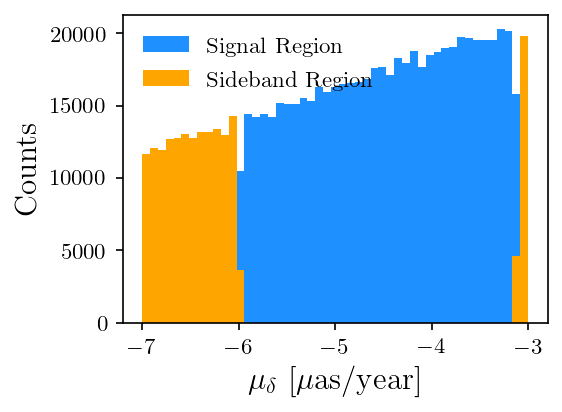

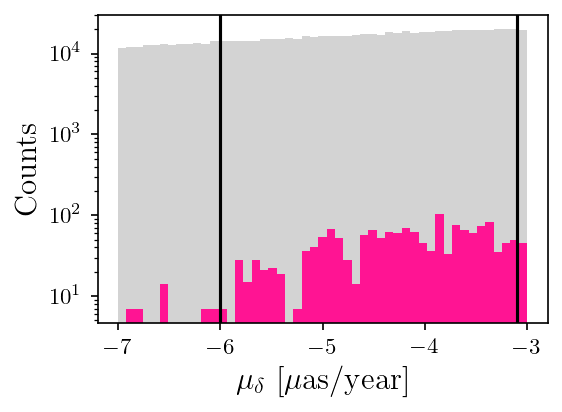

In [7]:
df_train = signal_sideband(df, stream="gd1_tail",
#                     Right tail patch
                    sb_min = -7, 
                    sr_min = -6, 
                    sr_max = -3.1,
                    sb_max = -3
                           
#                     sb_min = -4.5, 
#                     sr_min = -4, 
#                     sr_max = -3,
#                     sb_max = -2.5
                           
#                     sb_min = -10, 
#                     sr_min = -6, 
#                     sr_max = -1,
#                     sb_max = 1
                         
#                     # Left tail patch       
#                     sb_min = -15, 
#                     sr_min = -13.5, 
#                     sr_max = -11,
#                     sb_max = -10
                        )

Add sample weights to stream stars:

In [11]:
stream_weight = 1

### Throughout signal & sideband regions
df_train["weight"] = np.where(df_train['stream'] == True, stream_weight, 1)

/tmp/ipykernel_3600/352062698.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train["weight"] = np.where(df_train['stream'] == True, stream_weight, 1)


Train:

In [12]:
df_train.weight.unique()

array([1])

In [13]:
tf.keras.backend.clear_session()

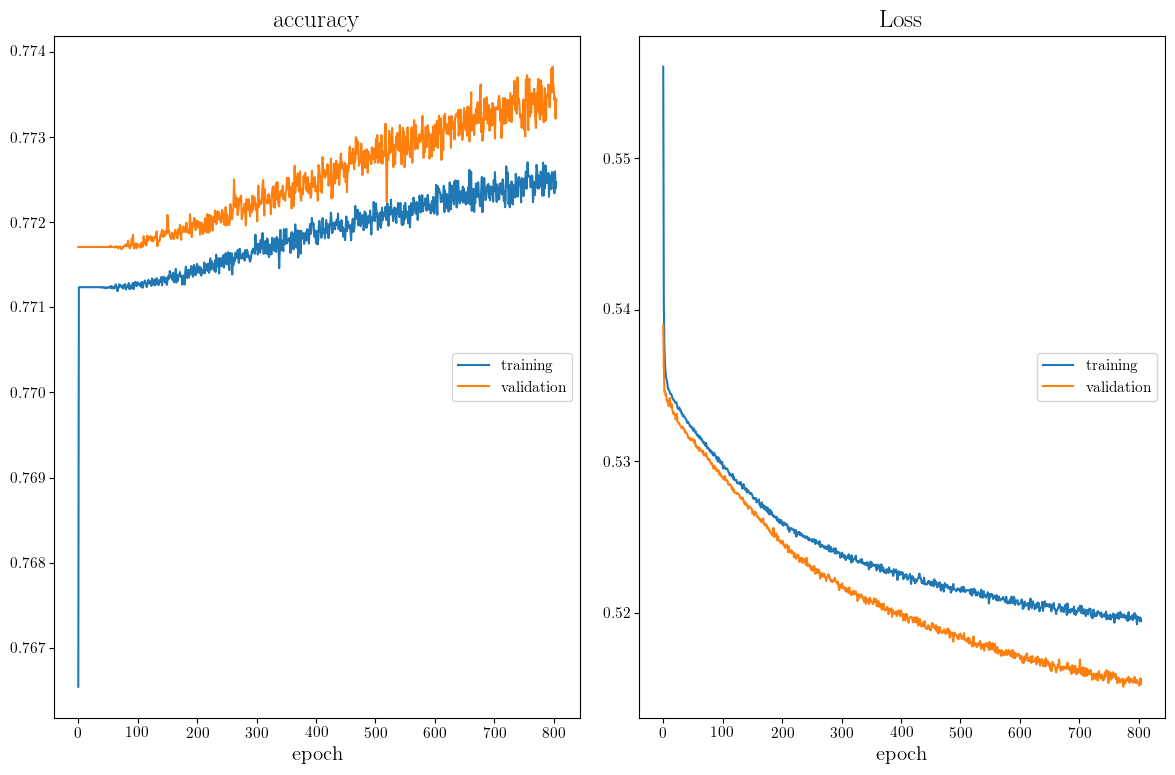

accuracy
	training         	 (min:    0.767, max:    0.773, cur:    0.772)
	validation       	 (min:    0.772, max:    0.774, cur:    0.773)
Loss
	training         	 (min:    0.519, max:    0.556, cur:    0.519)
	validation       	 (min:    0.515, max:    0.539, cur:    0.515)
56/56 [==============================] - 0s 7ms/step - loss: 0.5195 - accuracy: 0.7725 - val_loss: 0.5153 - val_accuracy: 0.7734
Best losses: [0.519244909286499]
Loading weights from best loop, i.e. loop #0.
AUC: 0.640
Maximum purity of 13.5% at 0.51%
Top 10 stars: Purity = 0.0% 
Top 20 stars: Purity = 0.0% 
Top 50 stars: Purity = 24.0% 
Top 100 stars: Purity = 31.0% 


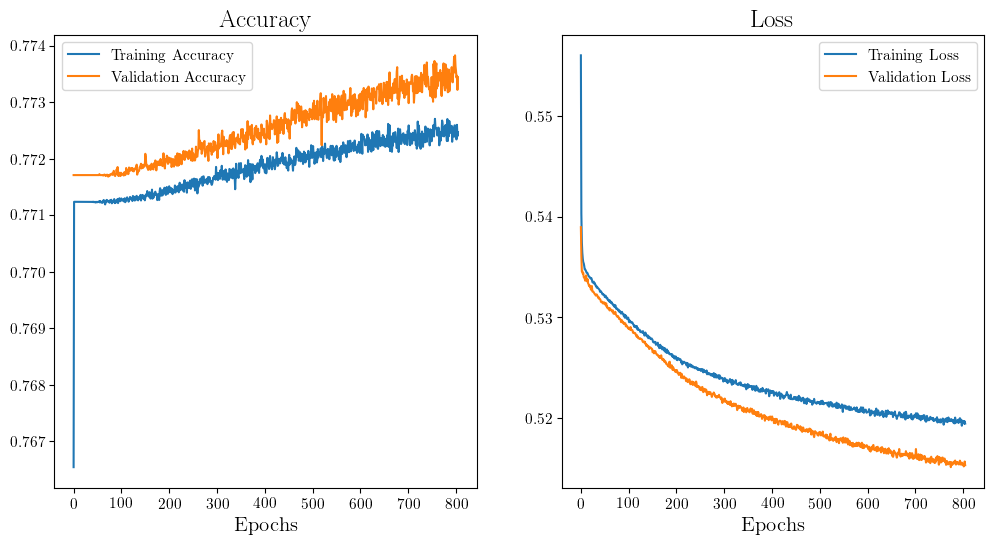

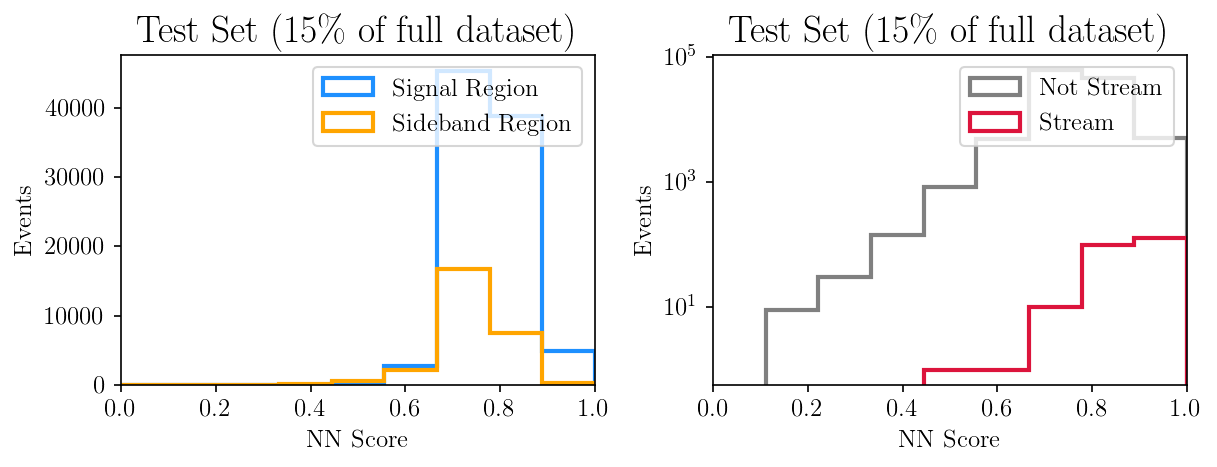

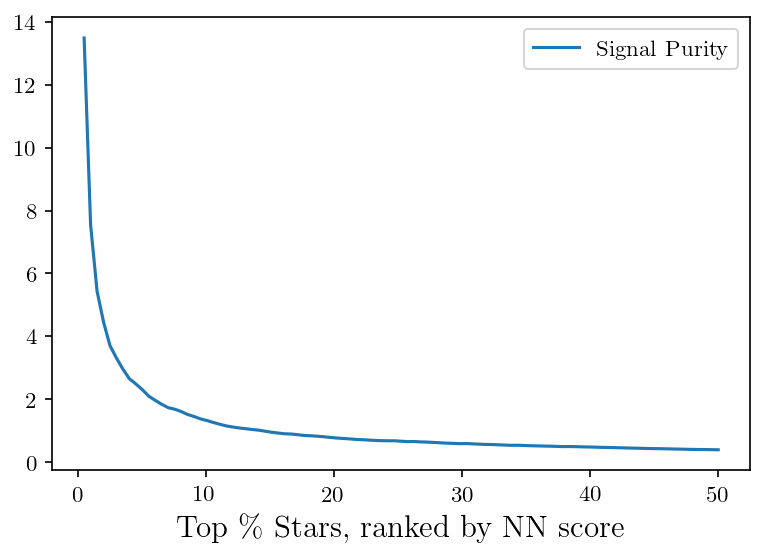

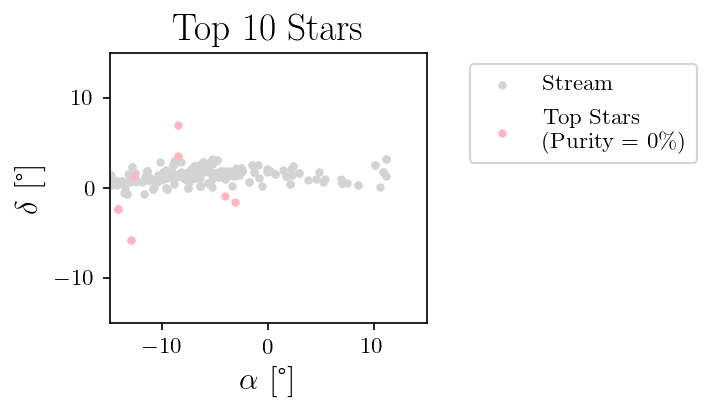

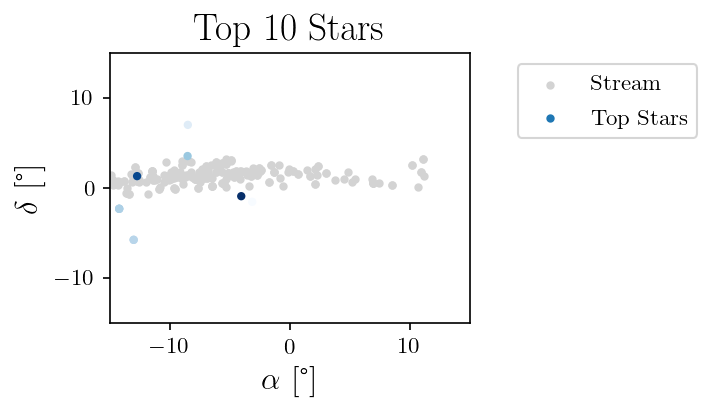

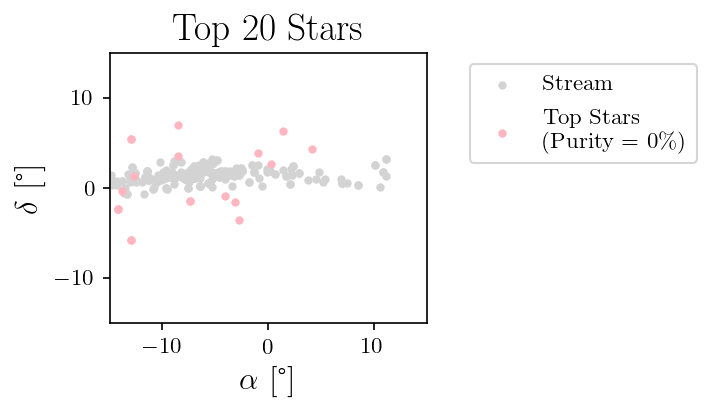

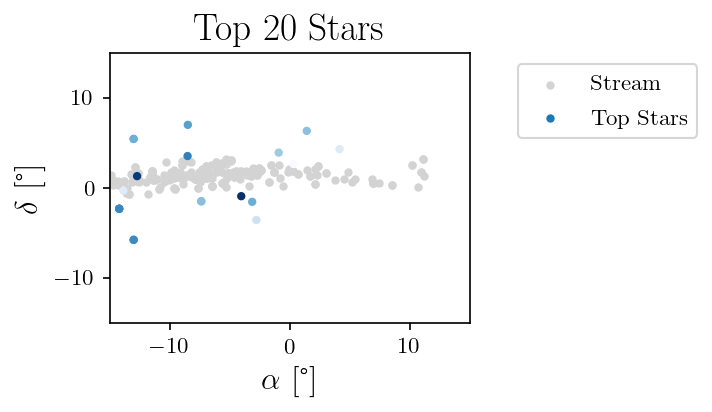

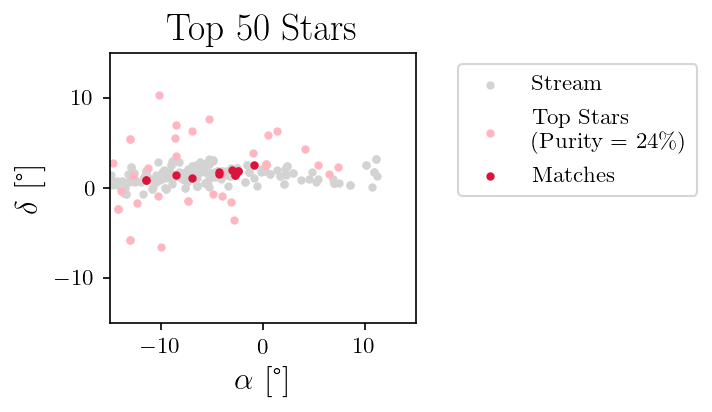

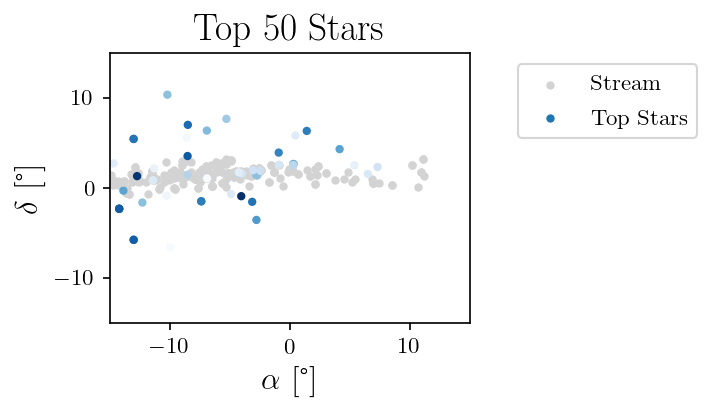

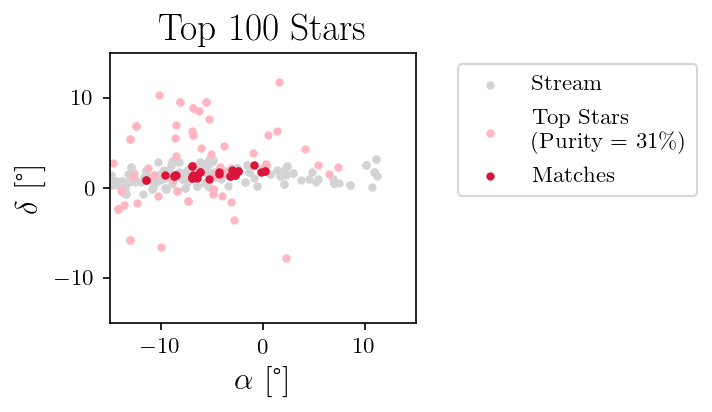

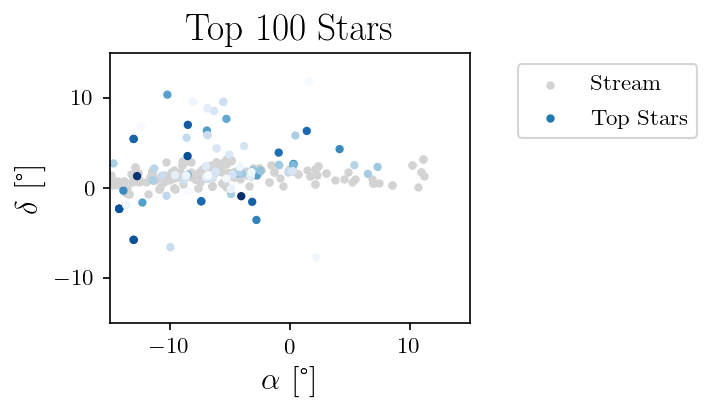

In [14]:
test = train(df_train,
      n_folds = 1, 
      best_of_n_loops = 1,
      layer_size = 128, 
      batch_size = 10000, 
      dropout = 0.2, 
      epochs = 2000,
      patience = 30)

# Load a pre-trained model

In [20]:
test = pd.read_hdf("./trained_models/foundtail_size128_batch10000_epochs2000/df_test.h5")

In [21]:
# visualize_stream(test)

Maximum purity of 13.5% at 0.51%
Top 10 stars: Purity = 0.0% 
Top 20 stars: Purity = 0.0% 
Top 50 stars: Purity = 24.0% 
Top 100 stars: Purity = 31.0% 


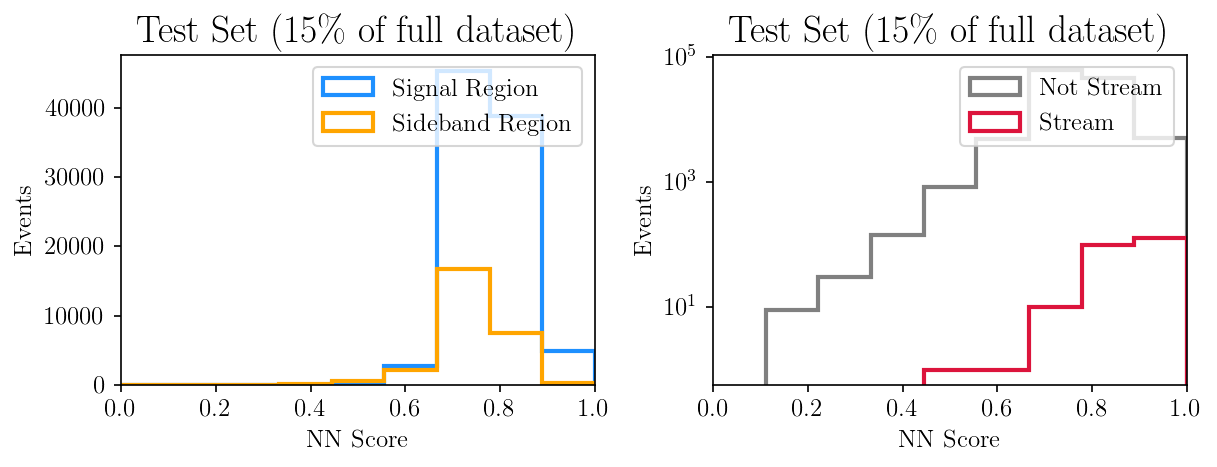

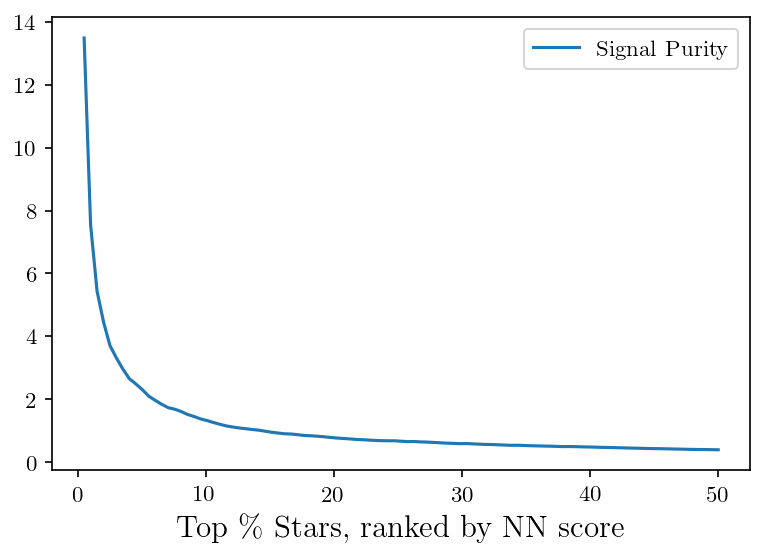

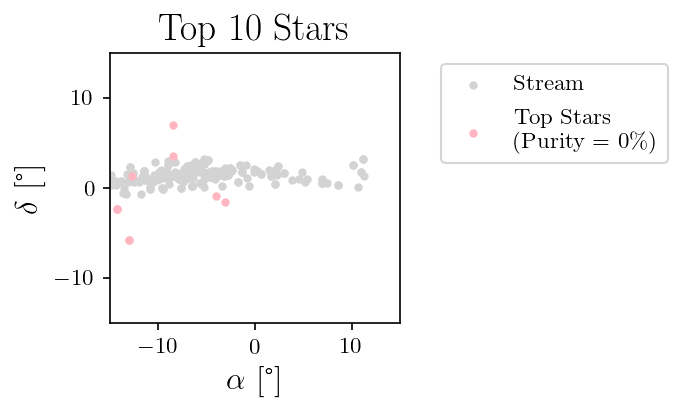

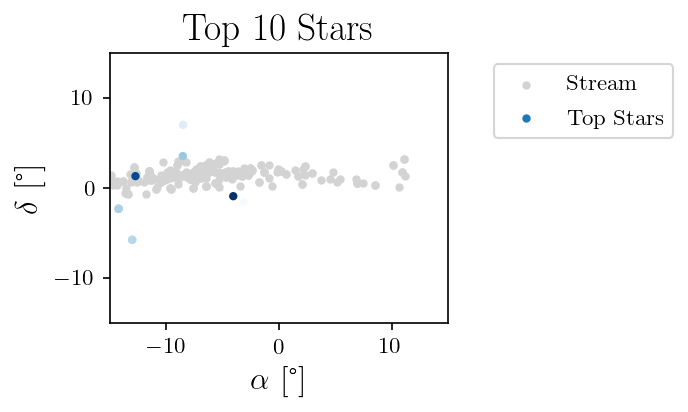

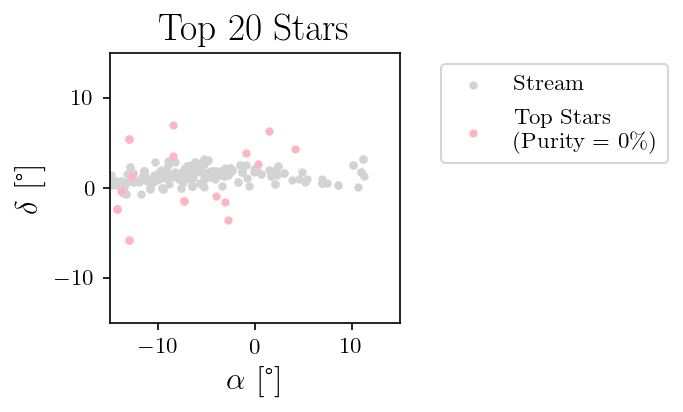

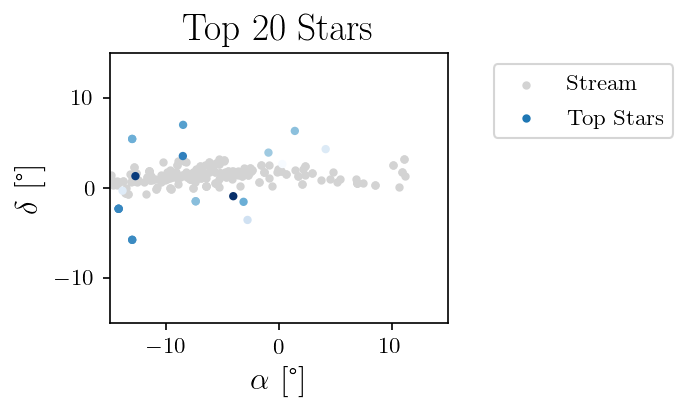

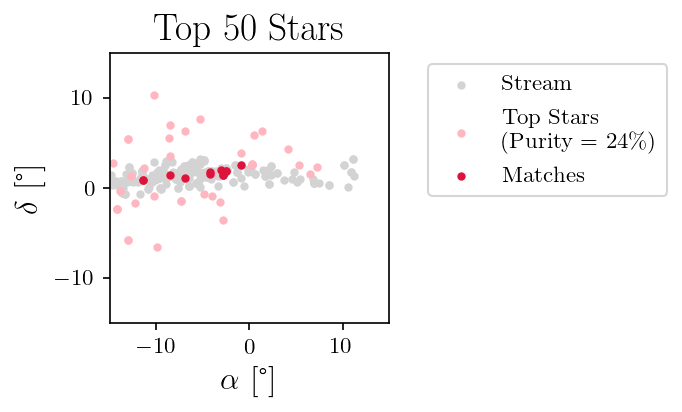

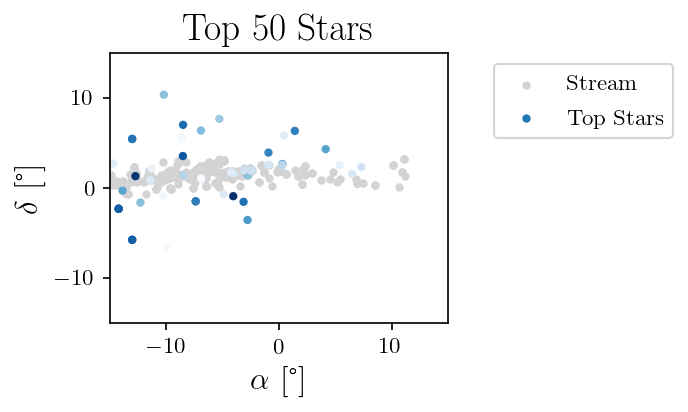

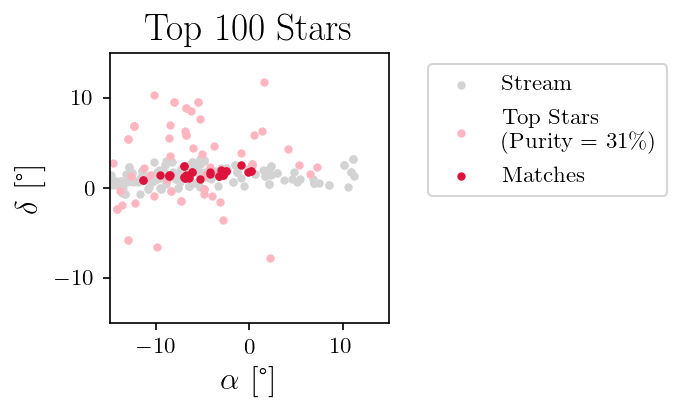

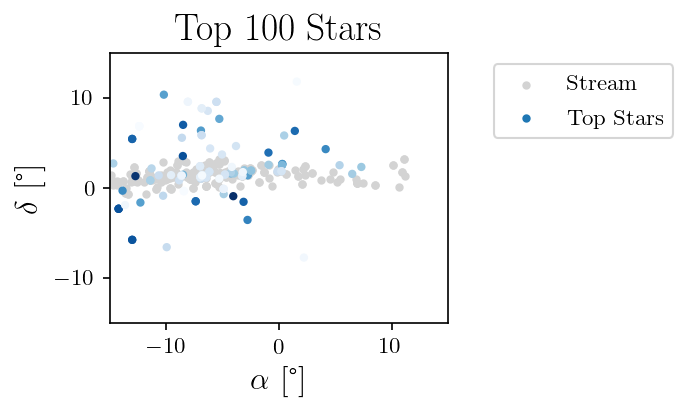

In [22]:
plot_results(test)

In [41]:
top_stars = test.sort_values('nn_score',ascending=False)[:100]

In [42]:
top_stars.keys()

Index(['μ_δ', 'μ_α', 'δ', 'α', 'color', 'mag', 'lon', 'lat', 'μ_loncoslat',
       'μ_lat', 'stream', 'patch_id', 'label', 'weight', 'nn_score'],
      dtype='object')

In [43]:
labeled_gd1 = top_stars[top_stars.stream]
unlabeled_gd1 = top_stars[top_stars.stream == False]

In [46]:
best_unlabeled = unlabeled_gd1.sort_values('nn_score',ascending=False)[:10]

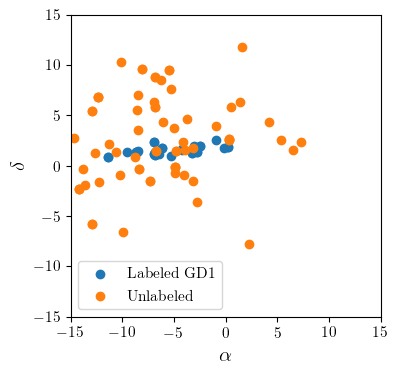

In [53]:
plt.figure(figsize=(4,4))
plt.scatter(labeled_gd1.α, labeled_gd1.δ, label="Labeled GD1")
plt.scatter(unlabeled_gd1.α, unlabeled_gd1.δ, label="Unlabeled")
plt.legend()
plt.xlim(-15,15)
plt.ylim(-15,15)
plt.xlabel(r"$\alpha$")
plt.ylabel(r"$\delta$");

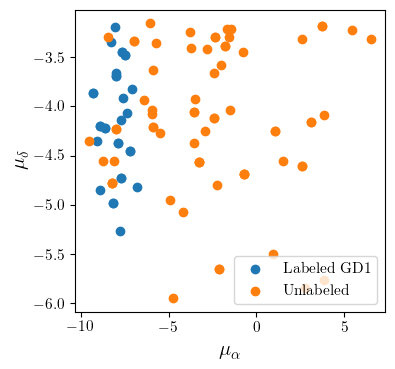

In [54]:
plt.figure(figsize=(4,4))
plt.scatter(labeled_gd1.μ_α, labeled_gd1.μ_δ, label="Labeled GD1")
plt.scatter(unlabeled_gd1.μ_α, unlabeled_gd1.μ_δ, label="Unlabeled")
plt.legend()
plt.xlabel(r"$\mu_\alpha$")
plt.ylabel(r"$\mu_\delta$");

# Run on each of the 21 GD1 patches

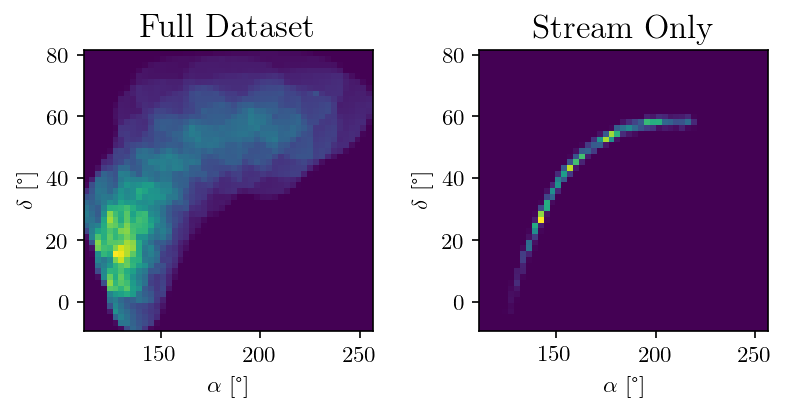

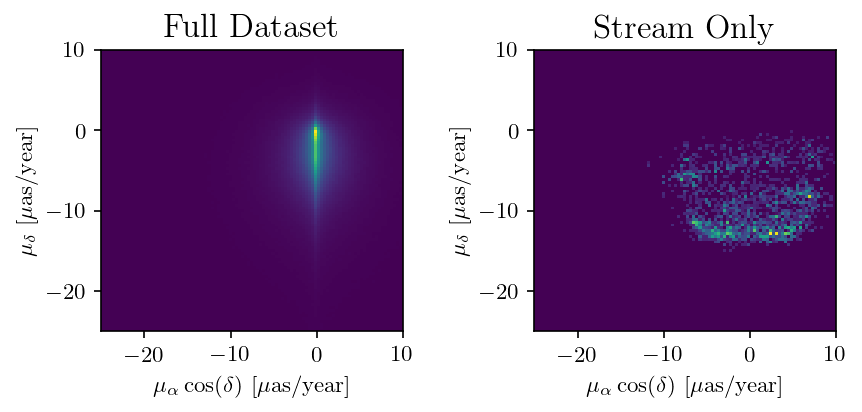

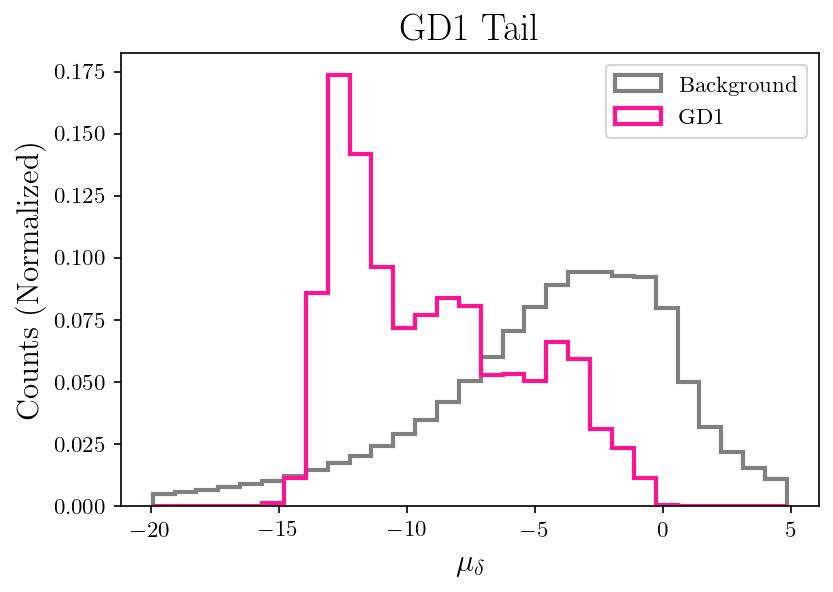

In [111]:
df_all = pd.read_hdf("./gaia_data/gd1/gd1_allpatches.h5")
visualize_stream(df_all)

Hand-pick limits for each patch:

In [99]:
limits = pd.DataFrame([[0,0,-14, -13, -11, -10],
                      [0,1,-14, -13, -12, -11],
                      [1,1,-13, -12, -11, -10],
                      [1,2,-10, -9, -7, -6],
                      [2,2,-6, -5, -3, -2],
                      [3,2,-4, -3, -1, 0]],
                      columns=["i","j","sb_min","sr_min","sr_max","sb_max"])
limits

,i,j,sb_min,sr_min,sr_max,sb_max
0,0,0,-14,-13,-11,-10
1,0,1,-14,-13,-12,-11
2,1,1,-13,-12,-11,-10
3,1,2,-10,-9,-7,-6
4,2,2,-6,-5,-3,-2
5,3,2,-4,-3,-1,0


210.0 50.66100883483887


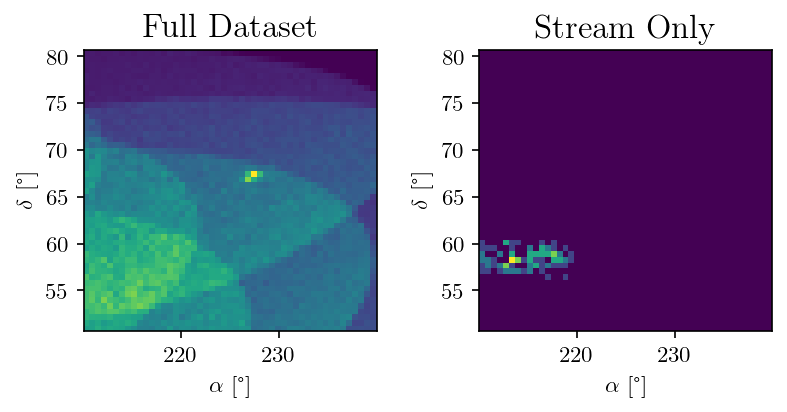

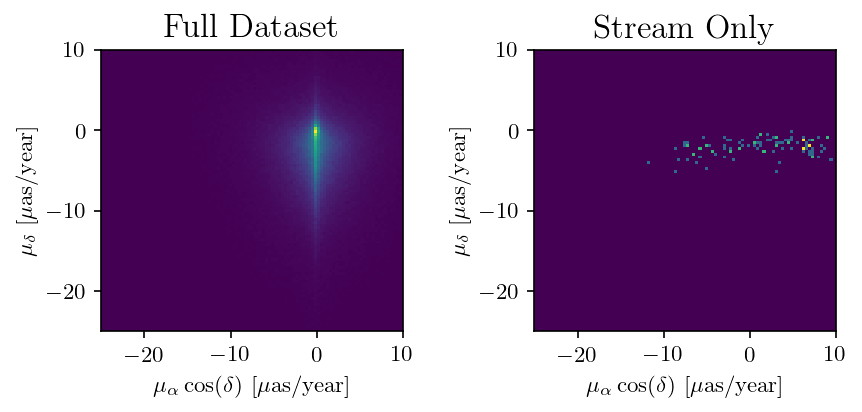

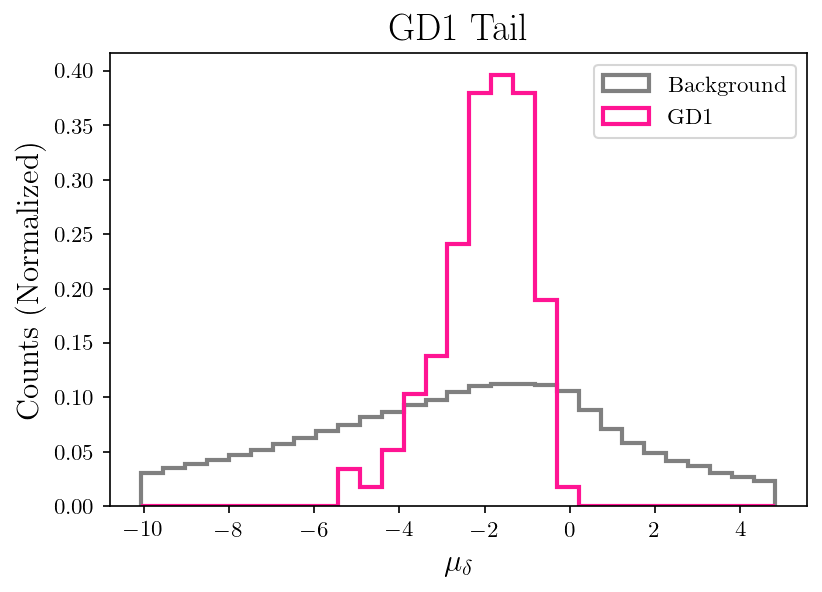

In [97]:
x_edges = np.arange(120, df_all.α.max(), 30).tolist()
x_edges.append(df_all.α.max())
y_edges = np.arange(df_all.δ.min(), df_all.δ.max(), 30).tolist()
y_edges.append(df_all.δ.max())

i=3
j=2
print(x_edges[i], y_edges[j])
df = df_all[((x_edges[i] < df_all.α) & (df_all.α < x_edges[i+1])) & 
                    ((y_edges[j] < df_all.δ) & (df_all.δ < y_edges[j+1]))
                   ]
if np.sum(df.stream)/len(df) < 0.0001: # skip patches with hardly any stream stars
    print("No stream stars")
visualize_stream(df)

Run over each patch:

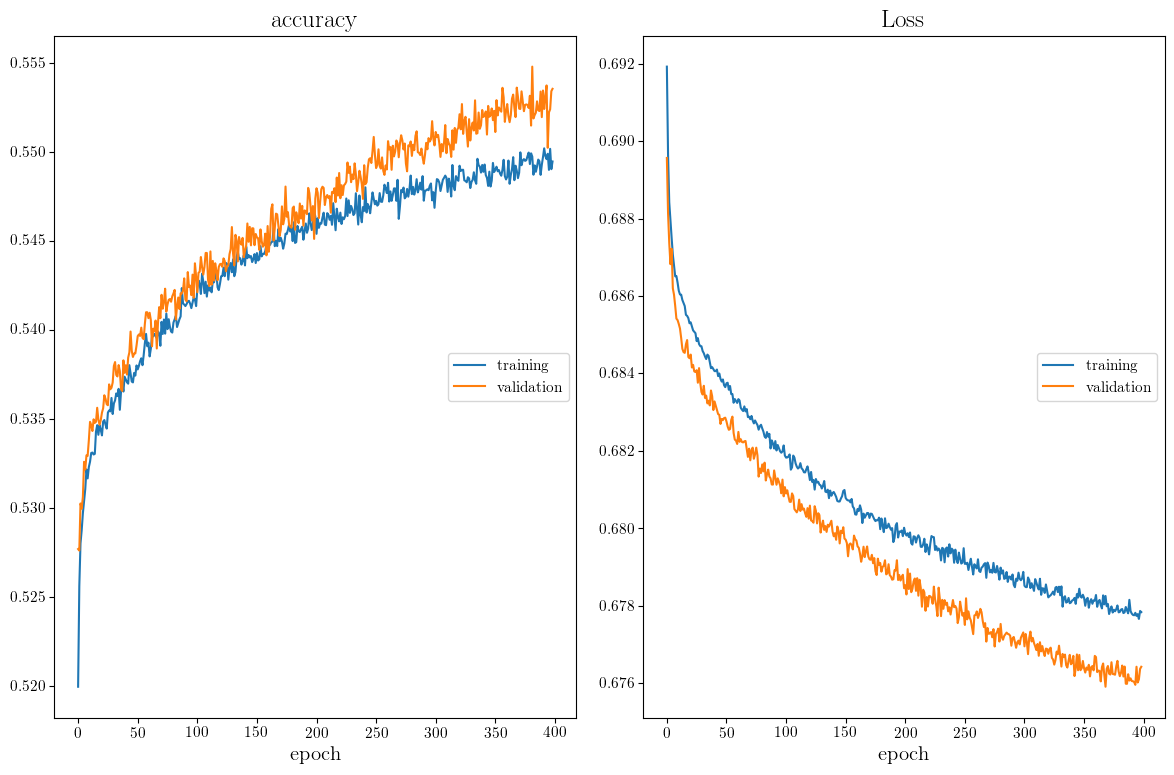

accuracy
	training         	 (min:    0.520, max:    0.550, cur:    0.549)
	validation       	 (min:    0.528, max:    0.555, cur:    0.554)
Loss
	training         	 (min:    0.678, max:    0.692, cur:    0.678)
	validation       	 (min:    0.676, max:    0.690, cur:    0.676)
491/491 [==============================] - 2s 4ms/step - loss: 0.6778 - accuracy: 0.5495 - val_loss: 0.6764 - val_accuracy: 0.5535
Best losses: [0.677656888961792]
Loading weights from best loop, i.e. loop #0.
AUC: 0.575
Maximum purity of 0.3% at 15.66%
Top 10 stars: Purity = 0.0% 
Top 20 stars: Purity = 0.0% 
Top 50 stars: Purity = 0.0% 
Top 100 stars: Purity = 0.0% 


 80%|████████  | 4/5 [1:08:31<16:19, 979.56s/it]

210.0 80.66100883483887
240.0 -9.338991165161133
240.0 20.661008834838867
240.0 50.66100883483887


/tmp/ipykernel_10598/3549888652.py:19: RuntimeWarning: invalid value encountered in long_scalars
  if np.sum(df.stream)/len(df) < 0.0001: # skip patches with hardly any stream stars
100%|██████████| 5/5 [1:08:32<00:00, 822.45s/it]

240.0 80.66100883483887


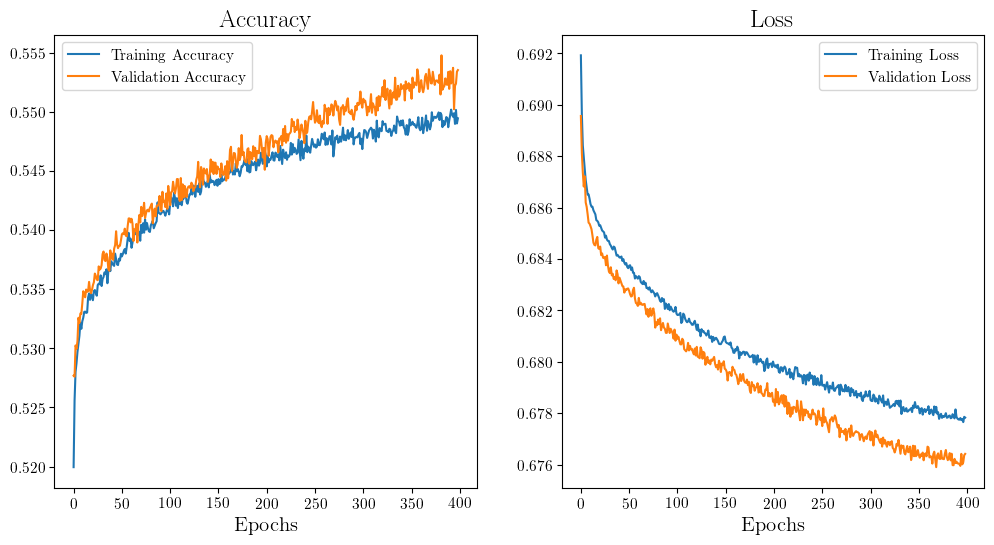

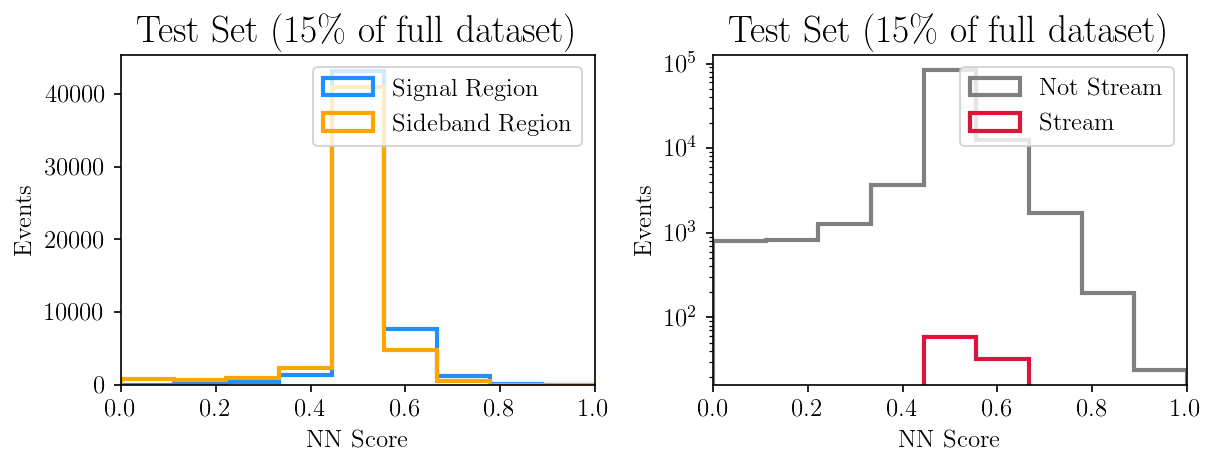

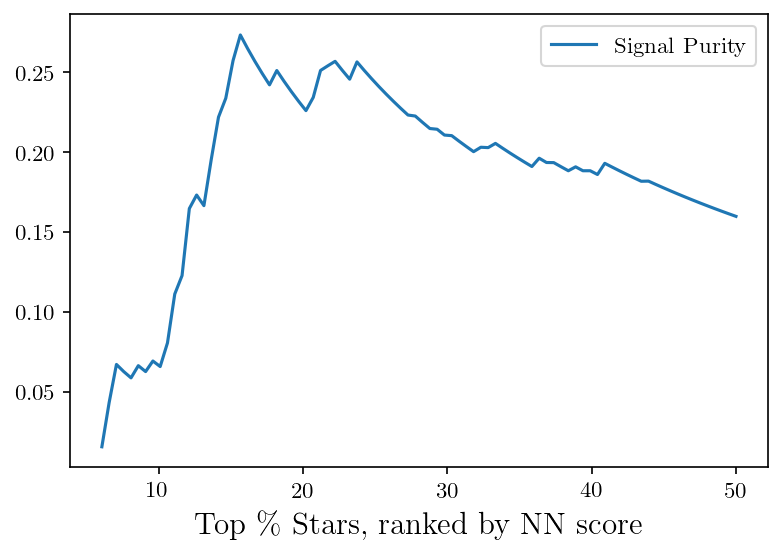

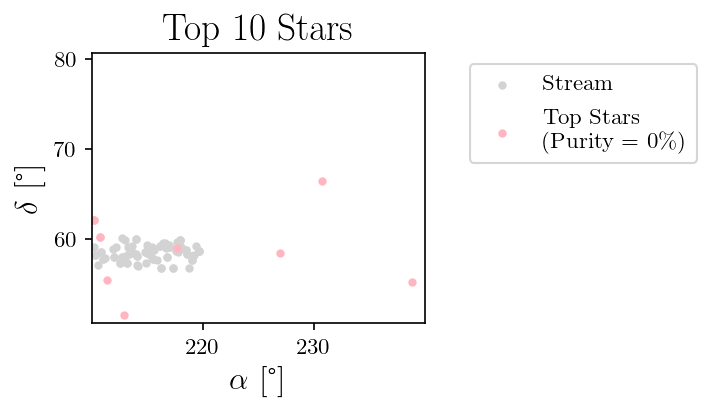

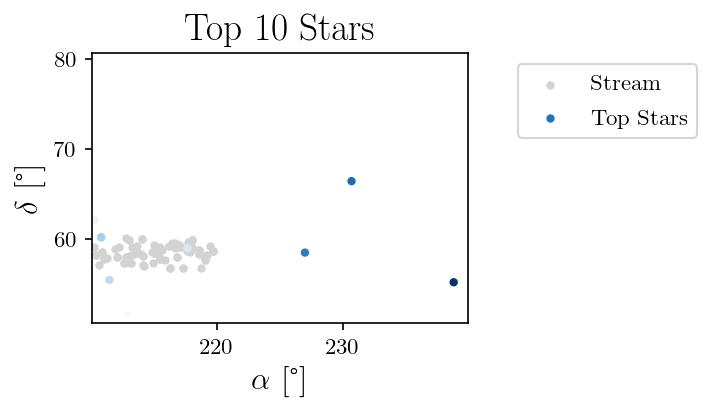

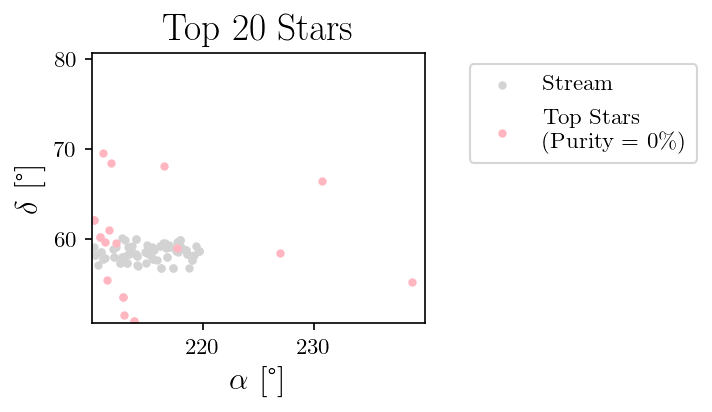

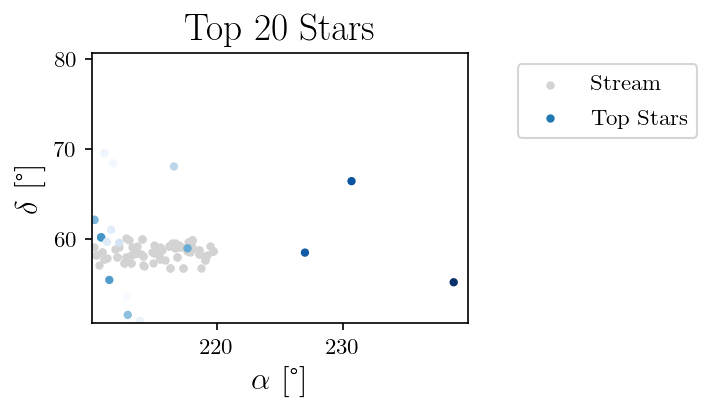

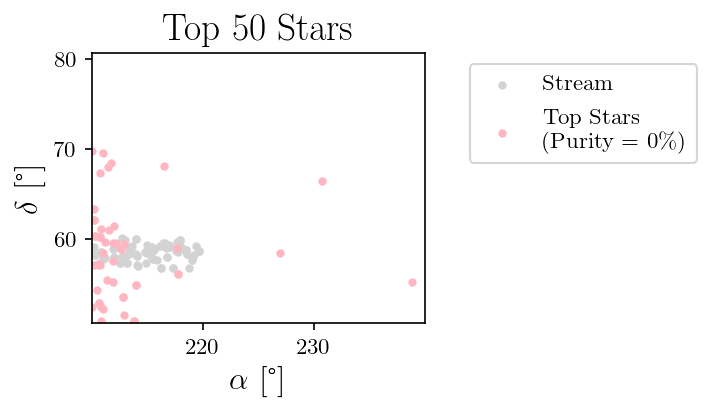

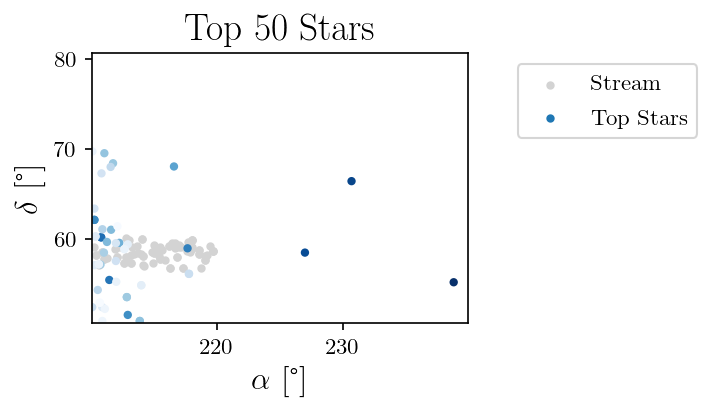

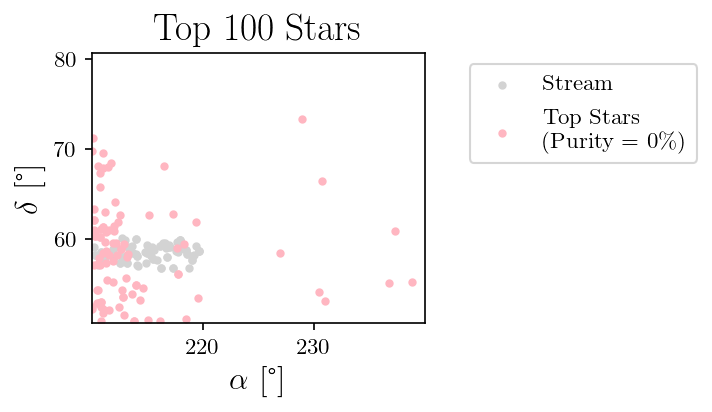

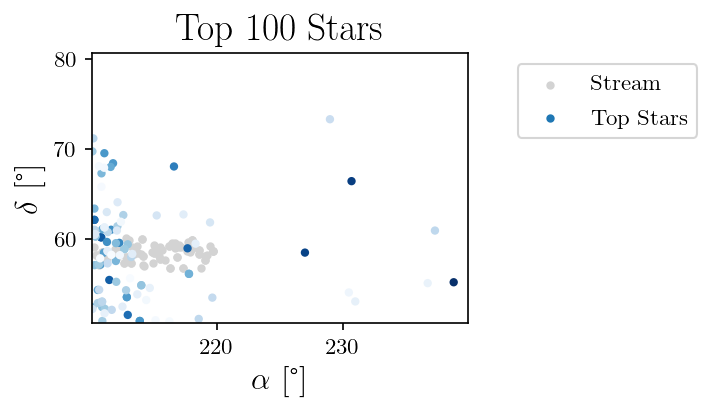

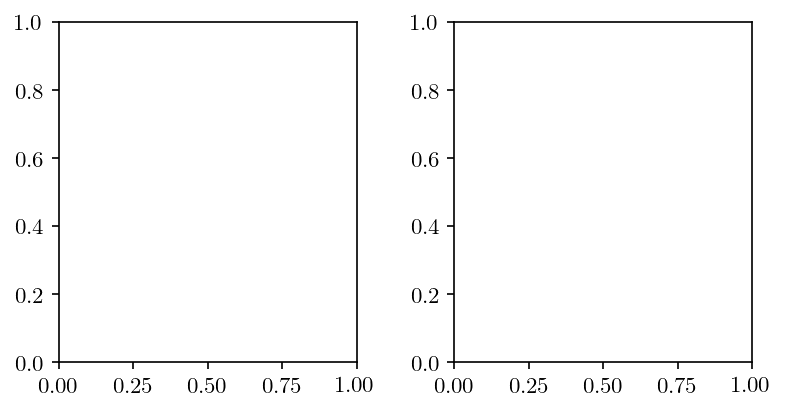

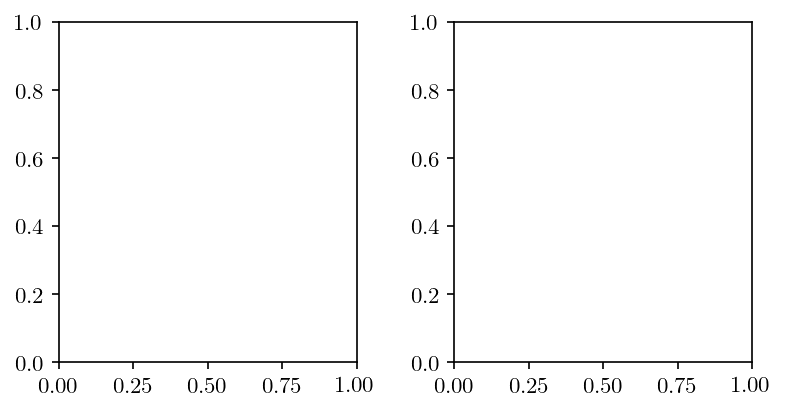

In [128]:
target_stream = []
top_100_stars = []

### Scan over patches
# for patch_id in tqdm(df_all.patch_id.unique()):
#     df = df_all[(df_all.patch_id == patch_id)]

### Scan over square patches of side length 30
x_edges = np.arange(120, df_all.α.max(), 30).tolist()
x_edges.append(df_all.α.max())
y_edges = np.arange(df_all.δ.min(), df_all.δ.max(), 30).tolist()
y_edges.append(df_all.δ.max())
for i in tqdm(range(len(x_edges)-1)):
    for j in range(len(y_edges)-1):
        print(x_edges[i], y_edges[j])
        df = df_all[((x_edges[i] < df_all.α) & (df_all.α < x_edges[i+1])) & 
                    ((y_edges[j] < df_all.δ) & (df_all.δ < y_edges[j+1]))
                   ]
        if np.sum(df.stream)/len(df) < 0.0001: # skip patches with hardly any stream stars
            continue
        else:
            try: 
                visualize_stream(df)
            except: 
                continue
            target_stream.append(df[df.stream])  
            df_train = signal_sideband(df,
                            sb_min = float(limits[(limits.i == i) & (limits.j == j)].sb_min),
                            sr_min = float(limits[(limits.i == i) & (limits.j == j)].sr_min),
                            sr_max = float(limits[(limits.i == i) & (limits.j == j)].sr_max),
                            sb_max = float(limits[(limits.i == i) & (limits.j == j)].sb_max),
                                )
            
            ### Add stream weights
            stream_weight = 1
            df_train["weight"] = np.where(df_train['stream'] == True, stream_weight, 1)

            tf.keras.backend.clear_session()
            test = train(df_train, 
              n_folds = 1, 
              best_of_n_loops = 1,
              layer_size = 128, 
              batch_size = 1000, 
              dropout = 0.2, 
              epochs = 1000, 
              patience = 30)
            top_100_stars.append(test.sort_values('nn_score',ascending=False)[:100])

In [132]:
all_gd1_stars = pd.concat([df for df in target_stream])
cwola_stars = pd.concat([df for df in top_100_stars])

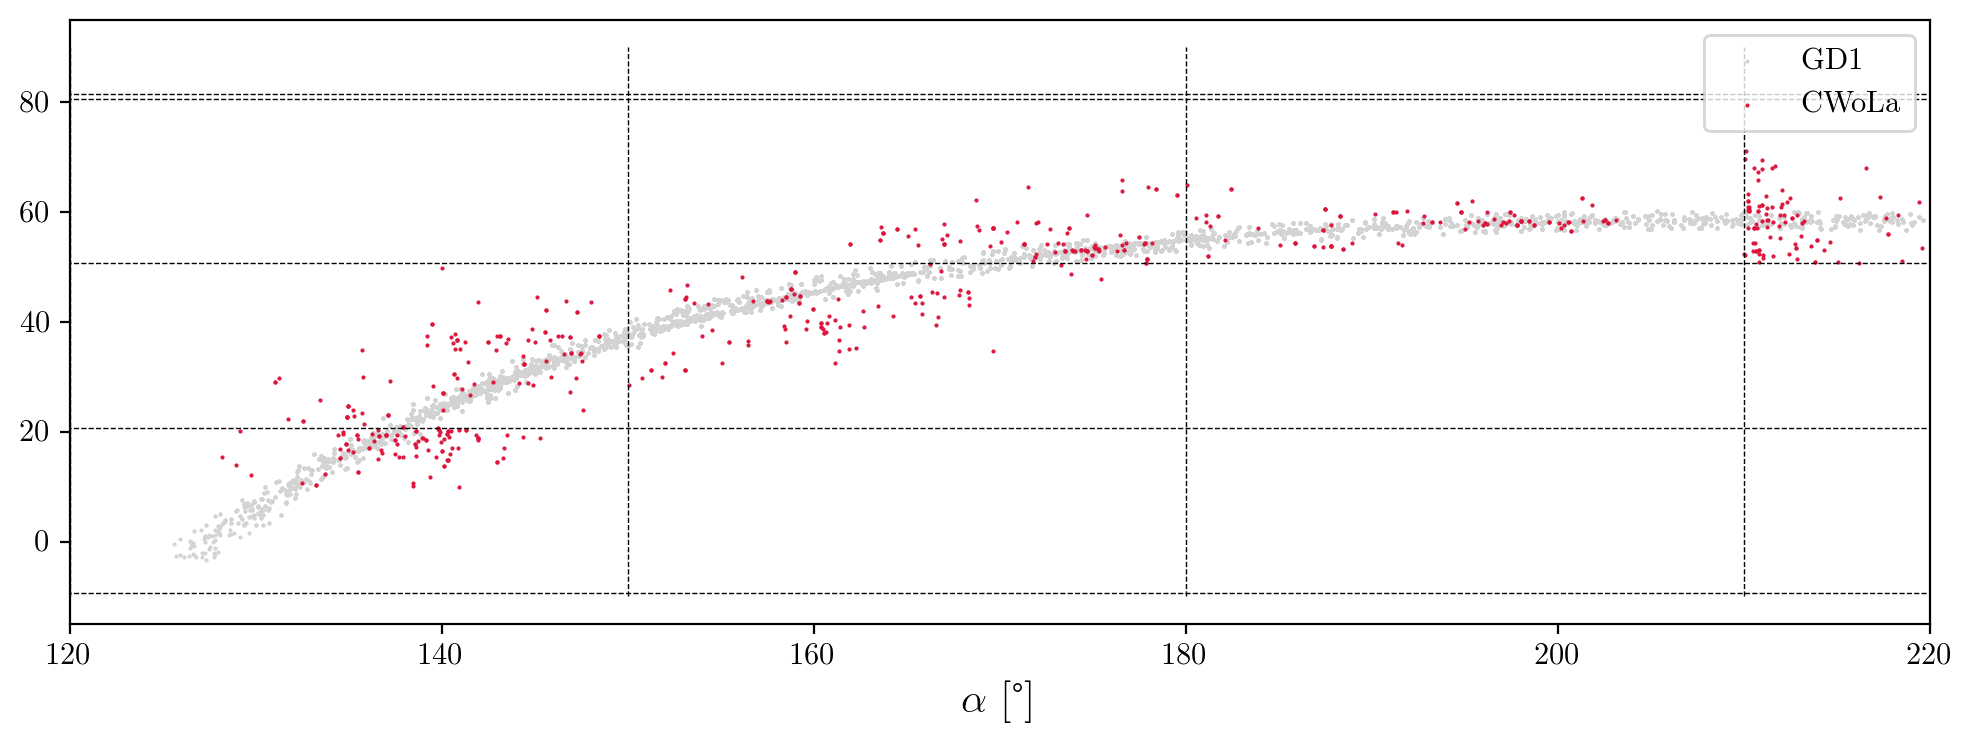

In [133]:
plt.figure(dpi=200, figsize=(12,4))
plt.scatter(all_gd1_stars.α, all_gd1_stars.δ, marker='.', s=1, 
            color="lightgray", label="GD1")
plt.scatter(cwola_stars.α, cwola_stars.δ, marker='.', s=1, 
            color="crimson", label="CWoLa")
plt.vlines(x_edges, -10,90, linewidth=0.5, linestyle="dashed", color="black")
plt.hlines(y_edges, 100,260, linewidth=0.5, linestyle="dashed", color="black")
plt.legend()
plt.xlabel(r"$\alpha$ [\textdegree]");
plt.xlim(120,220);

In [131]:
cwola_stars.stream.value_counts()

False    522
True      78
Name: stream, dtype: int64